## **Task 3-1**

Using device: cuda


100%|██████████| 26.4M/26.4M [00:01<00:00, 16.7MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 267kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.96MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 9.38MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Training Vanilla Autoencoder
Epoch [1/20] Loss: 0.0353
Epoch [2/20] Loss: 0.0190
Epoch [3/20] Loss: 0.0163
Epoch [4/20] Loss: 0.0145
Epoch [5/20] Loss: 0.0134
Epoch [6/20] Loss: 0.0126
Epoch [7/20] Loss: 0.0119
Epoch [8/20] Loss: 0.0114
Epoch [9/20] Loss: 0.0110
Epoch [10/20] Loss: 0.0106
Epoch [11/20] Loss: 0.0103
Epoch [12/20] Loss: 0.0100
Epoch [13/20] Loss: 0.0097
Epoch [14/20] Loss: 0.0095
Epoch [15/20] Loss: 0.0093
Epoch [16/20] Loss: 0.0092
Epoch [17/20] Loss: 0.0090
Epoch [18/20] Loss: 0.0088
Epoch [19/20] Loss: 0.0087
Epoch [20/20] Loss: 0.0086
Vanilla Autoencoder Test Loss: 0.0086

Training Deep Autoencoder
Epoch [1/20] Loss: 0.0395
Epoch [2/20] Loss: 0.0216
Epoch [3/20] Loss: 0.0190
Epoch [4/20] Loss: 0.0175
Epoch [5/20] Loss: 0.0163
Epoch [6/20] Loss: 0.0152
Epoch [7/20] Loss: 0.0143
Epoch [8/20] Loss: 0.0136
Epoch [9/20] Loss: 0.0131
Epoch [10/20] Loss: 0.0126
Epoch [11/20] Loss: 0.01

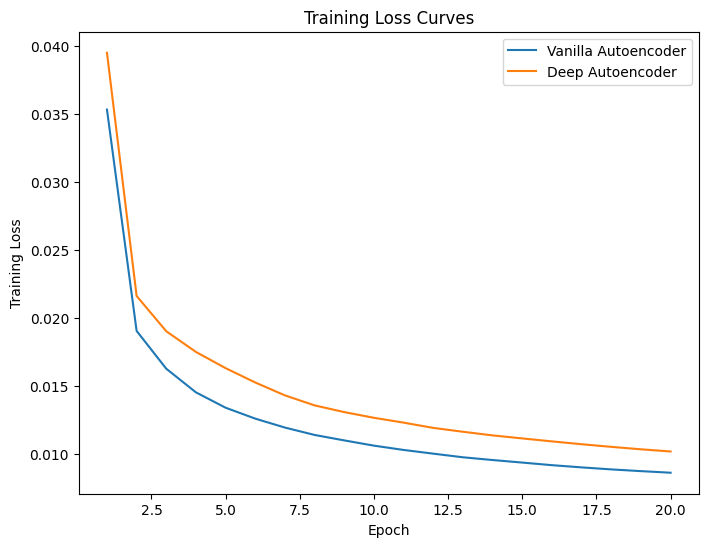

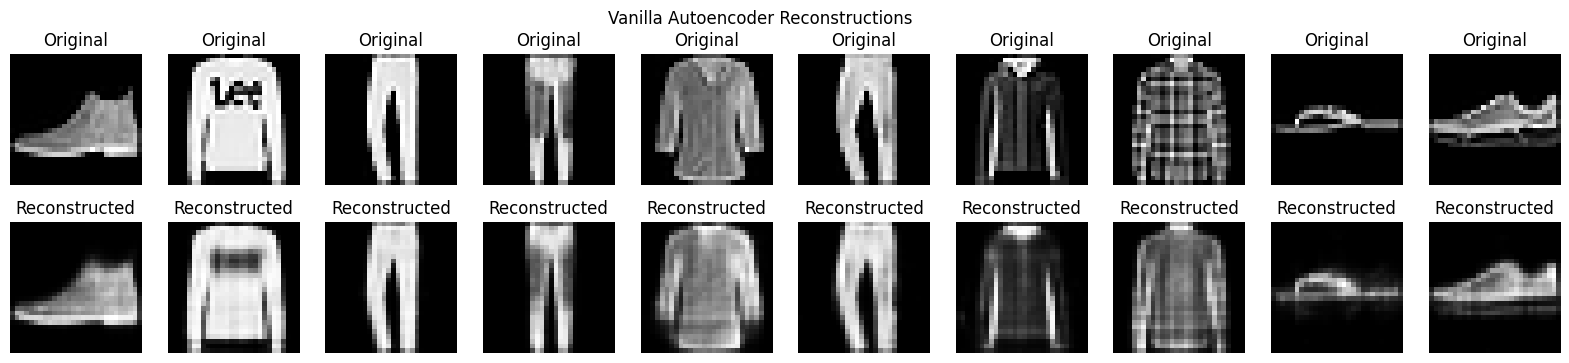

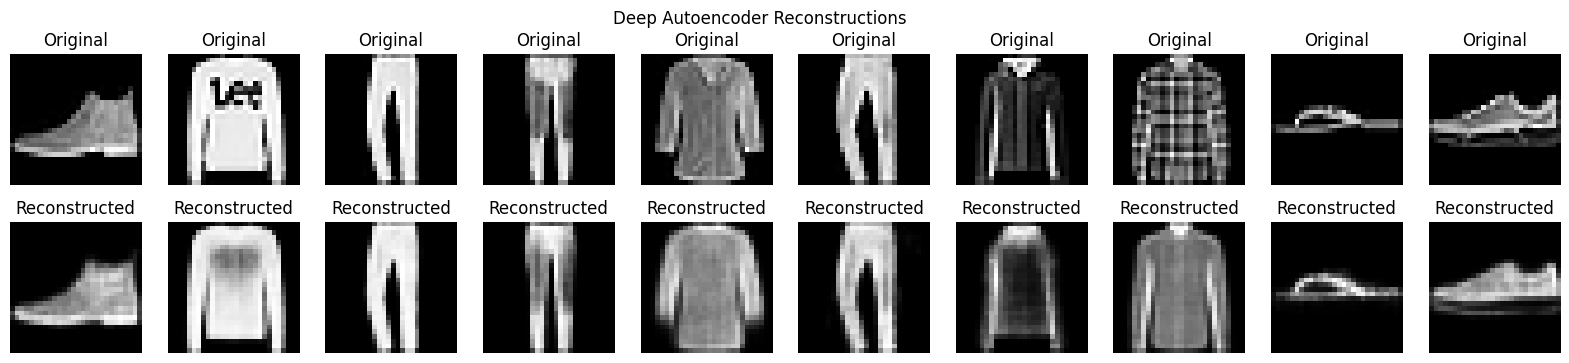

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class VanillaAutoencoder(nn.Module):
    def __init__(self):
        super(VanillaAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64)
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid(),
            nn.Unflatten(1, (1, 28, 28))
        )

    def forward(self, x):
        latent = self.encoder(x)
        reconstruction = self.decoder(latent)
        return reconstruction

class DeepAutoencoder(nn.Module):
    def __init__(self):
        super(DeepAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64)
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28 * 28),
            nn.Sigmoid(),
            nn.Unflatten(1, (1, 28, 28))
        )

    def forward(self, x):
        latent = self.encoder(x)
        reconstruction = self.decoder(latent)
        return reconstruction

def train_model(model, train_loader, num_epochs, criterion, optimizer, device):
    loss_history = []
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, _ in train_loader:
            images = images.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, images)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        loss_history.append(epoch_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}")
    return loss_history

def test_model(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for images, _ in test_loader:
            images = images.to(device)
            outputs = model(images)
            loss = criterion(outputs, images)
            test_loss += loss.item() * images.size(0)
    test_loss /= len(test_loader.dataset)
    return test_loss

def plot_reconstructions(model, test_loader, device, title, num_images=10):
    model.eval()
    # Get a batch of test images
    images, _ = next(iter(test_loader))
    images = images.to(device)
    with torch.no_grad():
        outputs = model(images)
    images = images.cpu()
    outputs = outputs.cpu()

    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title("Original")
        plt.axis("off")

        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(outputs[i].squeeze(), cmap='gray')
        plt.title("Reconstructed")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Using device:", device)

    num_epochs = 20
    batch_size = 128
    learning_rate = 1e-3

    transform = transforms.ToTensor()

    train_dataset = torchvision.datasets.FashionMNIST(
        root='./data', train=True, transform=transform, download=True
    )
    test_dataset = torchvision.datasets.FashionMNIST(
        root='./data', train=False, transform=transform, download=True
    )
    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True
    )
    test_loader = torch.utils.data.DataLoader(
        test_dataset, batch_size=batch_size, shuffle=False
    )

    criterion = nn.MSELoss()

    print("\nTraining Vanilla Autoencoder")
    vanilla_model = VanillaAutoencoder().to(device)
    optimizer_vanilla = optim.Adam(vanilla_model.parameters(), lr=learning_rate)
    vanilla_loss_history = train_model(vanilla_model, train_loader, num_epochs,
                                       criterion, optimizer_vanilla, device)
    vanilla_test_loss = test_model(vanilla_model, test_loader, criterion, device)
    print(f"Vanilla Autoencoder Test Loss: {vanilla_test_loss:.4f}")

    print("\nTraining Deep Autoencoder")
    deep_model = DeepAutoencoder().to(device)
    optimizer_deep = optim.Adam(deep_model.parameters(), lr=learning_rate)
    deep_loss_history = train_model(deep_model, train_loader, num_epochs,
                                    criterion, optimizer_deep, device)
    deep_test_loss = test_model(deep_model, test_loader, criterion, device)
    print(f"Deep Autoencoder Test Loss: {deep_test_loss:.4f}")

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, num_epochs + 1), vanilla_loss_history, label="Vanilla Autoencoder")
    plt.plot(range(1, num_epochs + 1), deep_loss_history, label="Deep Autoencoder")
    plt.xlabel("Epoch")
    plt.ylabel("Training Loss")
    plt.title("Training Loss Curves")
    plt.legend()
    plt.show()

    plot_reconstructions(vanilla_model, test_loader, device, "Vanilla Autoencoder Reconstructions")
    plot_reconstructions(deep_model, test_loader, device, "Deep Autoencoder Reconstructions")

if __name__ == '__main__':
    main()

## **Task 3-2**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd

tf.random.set_seed(42)
np.random.seed(42)

(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32')  / 255.0
X_train = np.expand_dims(X_train, -1)
X_test  = np.expand_dims(X_test, -1)

def build_model(dropout=False, batch_norm=False):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(28, 28, 1)))
    if batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    if batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    if dropout:
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    if dropout:
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

experiments = [
    {"name": "Baseline", "dropout": False, "batch_norm": False, "data_aug": False},
    {"name": "Dropout", "dropout": True, "batch_norm": False, "data_aug": False},
    {"name": "BatchNorm", "dropout": False, "batch_norm": True, "data_aug": False},
    {"name": "Dropout+BatchNorm", "dropout": True, "batch_norm": True, "data_aug": False},
    {"name": "DataAugmentation", "dropout": False, "batch_norm": False, "data_aug": True},
]

batch_size = 128
epochs = 10

results = []

for exp in experiments:
    print(f"\n{'='*40}\nStarting experiment: {exp['name']}\n{'='*40}")

    model = build_model(dropout=exp["dropout"], batch_norm=exp["batch_norm"])

    if exp["data_aug"]:
        datagen = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.1,
            width_shift_range=0.1,
            height_shift_range=0.1
        )
        datagen.fit(X_train)

        history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                            steps_per_epoch=len(X_train) // batch_size,
                            epochs=epochs,
                            validation_data=(X_test, y_test),
                            verbose=1)
    else:
        history = model.fit(X_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(X_test, y_test),
                            verbose=1)

    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test loss: {test_loss:.4f} - Test accuracy: {test_accuracy:.4f}")

    results.append({
        "Model": exp["name"],
        "Test Loss": test_loss,
        "Test Accuracy": test_accuracy
    })

results_df = pd.DataFrame(results)
print("\nComparison of Model Variants:")
print(results_df)


Starting experiment: Baseline


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7123 - loss: 0.8351 - val_accuracy: 0.8560 - val_loss: 0.4028
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8650 - loss: 0.3817 - val_accuracy: 0.8701 - val_loss: 0.3544
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8824 - loss: 0.3268 - val_accuracy: 0.8774 - val_loss: 0.3328
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8928 - loss: 0.2934 - val_accuracy: 0.8842 - val_loss: 0.3161
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9010 - loss: 0.2685 - val_accuracy: 0.8886 - val_loss: 0.3032
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9070 - loss: 0.2488 - val_accuracy: 0.8965 - val_loss: 0.2840
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9141 - loss: 0.2312 - val_accuracy: 0.9010 - val_loss: 0.2739
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9197 - loss: 0.2156 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


468/468 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.6375 - loss: 1.0353 - val_accuracy: 0.7858 - val_loss: 0.5516
Epoch 2/10
  1/468 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8281 - loss: 0.4844

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8281 - loss: 0.4844 - val_accuracy: 0.7940 - val_loss: 0.5411
Epoch 3/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.7880 - loss: 0.5670 - val_accuracy: 0.8442 - val_loss: 0.4364
Epoch 4/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8047 - loss: 0.5958 - val_accuracy: 0.8442 - val_loss: 0.4365
Epoch 5/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8140 - loss: 0.4952 - val_accuracy: 0.8544 - val_loss: 0.3985
Epoch 6/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7734 - loss: 0.5907 - val_accuracy: 0.8539 - val_loss: 0.3988
Epoch 7/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8329 - loss: 0.4472 - val_accuracy: 0.8550 - val_loss: 0.3999
Epoch 8/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7891 - loss: 0.5141 - val_accuracy: 0.8612 - val_loss: 0.3863
Epoch 9/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8459 - loss: 0.4168 - val_accuracy: 0.861

## **Task 3-3**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
tf.random.set_seed(42)
np.random.seed(42)

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

def build_model(dropout=False, batch_norm=False):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    if batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    if dropout:
        model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    if batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    if dropout:
        model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    if batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    if dropout:
        model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(128))
    if batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    if dropout:
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

experiments = [
    {"name": "Baseline", "dropout": False, "batch_norm": False, "data_aug": False},
    {"name": "Dropout", "dropout": True, "batch_norm": False, "data_aug": False},
    {"name": "BatchNorm", "dropout": False, "batch_norm": True, "data_aug": False},
    {"name": "Dropout+BatchNorm", "dropout": True, "batch_norm": True, "data_aug": False},
    {"name": "DataAugmentation", "dropout": False, "batch_norm": False, "data_aug": True},
]

batch_size = 64
epochs = 10
results = []

for exp in experiments:
    print(f"\n{'='*40}\nStarting experiment: {exp['name']}\n{'='*40}")

    model = build_model(dropout=exp["dropout"], batch_norm=exp["batch_norm"])

    if exp["data_aug"]:
        datagen = ImageDataGenerator(
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
        )
        datagen.fit(x_train)

        history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                            steps_per_epoch=len(x_train) // batch_size,
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            verbose=1)
    else:
        history = model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            verbose=1)

    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test loss: {test_loss:.4f} - Test accuracy: {test_accuracy:.4f}")

    results.append({
        "Model": exp["name"],
        "Test Loss": test_loss,
        "Test Accuracy": test_accuracy
    })

results_df = pd.DataFrame(results)
print("\nPerformance Comparison:")
print(results_df)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

Starting experiment: Baseline


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3752 - loss: 1.7017 - val_accuracy: 0.6048 - val_loss: 1.1152
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6254 - loss: 1.0587 - val_accuracy: 0.6782 - val_loss: 0.9109
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6974 - loss: 0.8643 - val_accuracy: 0.7026 - val_loss: 0.8575
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7424 - loss: 0.7441 - val_accuracy: 0.7256 - val_loss: 0.8074
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7751 - loss: 0.6516 - val_accuracy: 0.7279 - val_loss: 0.8320
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8014 - loss: 0.5762 - val_accuracy: 0.7327 - val_loss: 0.8376
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8174 - loss: 0.5280 - val_accuracy: 0.7379 - val_loss: 0.8339
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8398 - loss: 0.4667 - val_accuracy: 0

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.3637 - loss: 1.7403 - val_accuracy: 0.5603 - val_loss: 1.2516
Epoch 2/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6250 - loss: 1.2525

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 863us/step - accuracy: 0.6250 - loss: 1.2525 - val_accuracy: 0.5648 - val_loss: 1.2227
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.5639 - loss: 1.2132 - val_accuracy: 0.6548 - val_loss: 0.9862
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.5938 - loss: 1.0056 - val_accuracy: 0.6551 - val_loss: 1.0034
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6290 - loss: 1.0428 - val_accuracy: 0.6912 - val_loss: 0.8939
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - accuracy: 0.7656 - loss: 0.8278 - val_accuracy: 0.6897 - val_loss: 0.9002
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6716 - loss: 0.9331 - val_accuracy: 0.6966 - val_loss: 0.8859
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.7500 - loss: 0.8413 - val_accuracy: 0.7019 - val_loss: 0.8685
Epoch 9/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6992 - loss: 0.8592 - val_accurac

## **Task 3-4 (Extra)**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training Sparse_Under_S ...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.4843 - val_loss: 0.1791
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1722 - val_loss: 0.1559
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1518 - val_loss: 0.1243
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1199 - val_loss: 0.1109
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1086 - val_loss: 0.1050
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1031 - val_loss: 0.0990
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0990 - val_loss: 0.0954
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0966 - val_loss: 0.0932
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0944 - val_loss: 0.0945
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0927 - val_loss: 0.0898

Training Sparse_Over_D ...
Epoch 1/10
469/469 ━━━━━━━━━━━━

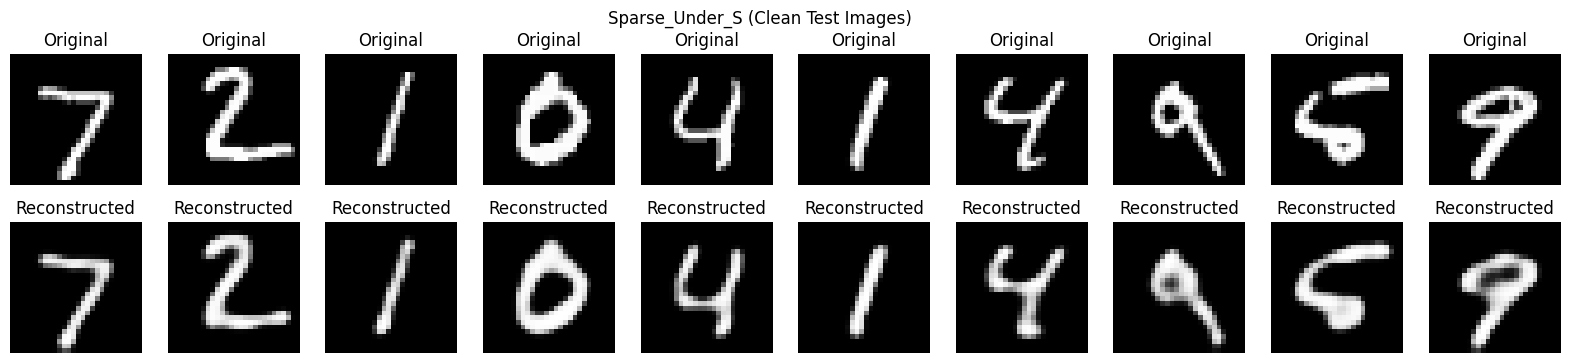

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


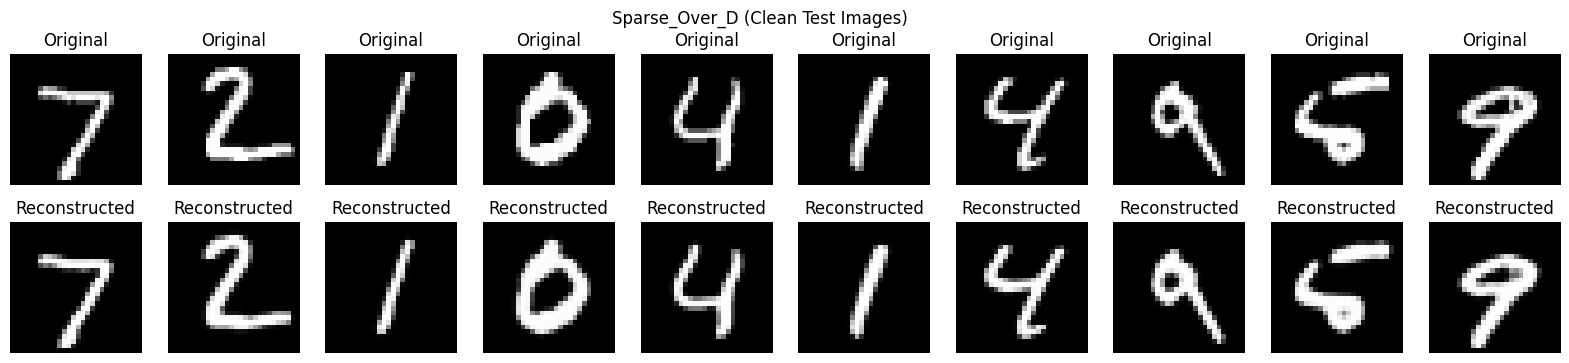

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


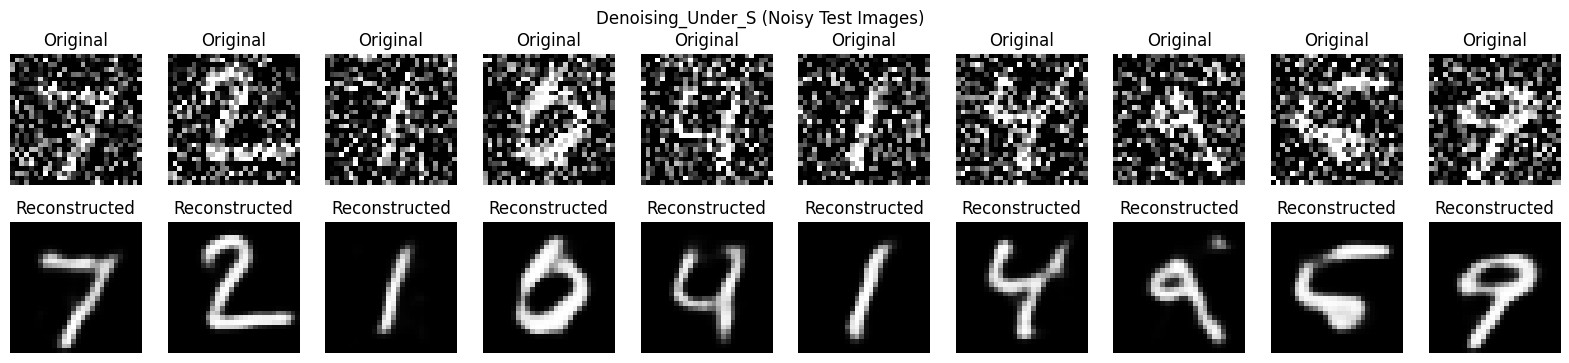

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


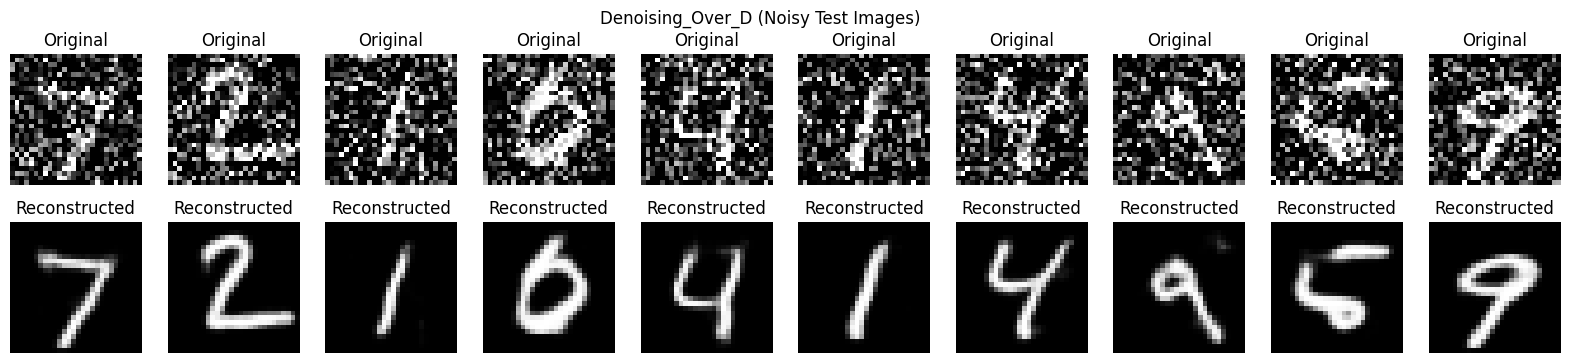

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32')  / 255.
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test  = np.reshape(x_test,  (-1, 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy  = x_test  + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy  = np.clip(x_test_noisy, 0., 1.)

def build_sparse_autoencoder(variant='undercomplete', depth='shallow', input_shape=(28,28,1), sparsity_reg=1e-4):

    input_img = layers.Input(shape=input_shape)

    if depth == 'shallow':
        if variant == 'undercomplete':
            x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
            x = layers.MaxPooling2D((2,2), padding='same')(x)
            x = layers.Conv2D(16, (3,3), activation='relu', padding='same',
                              activity_regularizer=regularizers.l1(sparsity_reg))(x)
            encoded = layers.MaxPooling2D((2,2), padding='same', name='encoded')(x)
        elif variant == 'overcomplete':
            x = layers.Conv2D(64, (3,3), activation='relu', padding='same',
                              activity_regularizer=regularizers.l1(sparsity_reg))(input_img)
            encoded = layers.Conv2D(64, (3,3), activation='relu', padding='same', name='encoded')(x)
        else:
            raise ValueError("Unknown variant")

    elif depth == 'deep':
        if variant == 'undercomplete':
            x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
            x = layers.MaxPooling2D((2,2), padding='same')(x)
            x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
            x = layers.MaxPooling2D((2,2), padding='same')(x)
            x = layers.Conv2D(128, (3,3), activation='relu', padding='same',
                              activity_regularizer=regularizers.l1(sparsity_reg))(x)
            encoded = layers.MaxPooling2D((2,2), padding='same', name='encoded')(x)
        elif variant == 'overcomplete':
            x = layers.Conv2D(64, (3,3), activation='relu', padding='same',
                              activity_regularizer=regularizers.l1(sparsity_reg))(input_img)
            x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
            x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
            encoded = layers.Conv2D(64, (3,3), activation='relu', padding='same', name='encoded')(x)
        else:
            raise ValueError("Unknown variant")
    else:
        raise ValueError("Unknown depth")

    if depth == 'shallow':
        if variant == 'undercomplete':
            x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(encoded)
            x = layers.UpSampling2D((2,2))(x)
            x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
            x = layers.UpSampling2D((2,2))(x)
            decoded = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)
        elif variant == 'overcomplete':
            decoded = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(encoded)
        else:
            raise ValueError("Unknown variant")

    elif depth == 'deep':
        if variant == 'undercomplete':
            x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(encoded)
            x = layers.UpSampling2D((2,2))(x)
            x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
            x = layers.UpSampling2D((2,2))(x)
            x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
            x = layers.UpSampling2D((2,2))(x)
            decoded = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)
        elif variant == 'overcomplete':
            x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(encoded)
            x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
            decoded = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)
        else:
            raise ValueError("Unknown variant")
    else:
        raise ValueError("Unknown depth")

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

def build_denoising_autoencoder(variant='undercomplete', depth='shallow', input_shape=(28,28,1)):

    input_img = layers.Input(shape=input_shape)

    if depth == 'shallow':
        if variant == 'undercomplete':
            x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
            x = layers.MaxPooling2D((2,2), padding='same')(x)
            x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)
            encoded = layers.MaxPooling2D((2,2), padding='same', name='encoded')(x)
        elif variant == 'overcomplete':
            x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(input_img)
            encoded = layers.Conv2D(64, (3,3), activation='relu', padding='same', name='encoded')(x)
        else:
            raise ValueError("Unknown variant")

    elif depth == 'deep':
        if variant == 'undercomplete':
            x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
            x = layers.MaxPooling2D((2,2), padding='same')(x)
            x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
            x = layers.MaxPooling2D((2,2), padding='same')(x)
            x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
            encoded = layers.MaxPooling2D((2,2), padding='same', name='encoded')(x)
        elif variant == 'overcomplete':
            x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(input_img)
            x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
            encoded = layers.Conv2D(64, (3,3), activation='relu', padding='same', name='encoded')(x)
        else:
            raise ValueError("Unknown variant")
    else:
        raise ValueError("Unknown depth")

    if depth == 'shallow':
        if variant == 'undercomplete':
            x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(encoded)
            x = layers.UpSampling2D((2,2))(x)
            x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
            x = layers.UpSampling2D((2,2))(x)
            decoded = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)
        elif variant == 'overcomplete':
            decoded = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(encoded)
        else:
            raise ValueError("Unknown variant")

    elif depth == 'deep':
        if variant == 'undercomplete':
            x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(encoded)
            x = layers.UpSampling2D((2,2))(x)
            x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
            x = layers.UpSampling2D((2,2))(x)
            x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
            x = layers.UpSampling2D((2,2))(x)
            decoded = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)
        elif variant == 'overcomplete':
            x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(encoded)
            x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
            decoded = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)
        else:
            raise ValueError("Unknown variant")
    else:
        raise ValueError("Unknown depth")

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

autoencoder_configs = {
    "Sparse_Under_S": {"type": "sparse", "variant": "undercomplete", "depth": "shallow"},
    "Sparse_Over_D":  {"type": "sparse", "variant": "overcomplete", "depth": "deep"},
    "Denoising_Under_S": {"type": "denoising", "variant": "undercomplete", "depth": "shallow"},
    "Denoising_Over_D":  {"type": "denoising", "variant": "overcomplete", "depth": "deep"}
}

epochs = 10
batch_size = 128
trained_models = {}

for name, config in autoencoder_configs.items():
    print(f"\nTraining {name} ...")
    if config["type"] == "sparse":
        model = build_sparse_autoencoder(variant=config["variant"],
                                         depth=config["depth"],
                                         input_shape=(28,28,1))
        history = model.fit(x_train, x_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            shuffle=True,
                            validation_data=(x_test, x_test),
                            verbose=1)
    elif config["type"] == "denoising":
        model = build_denoising_autoencoder(variant=config["variant"],
                                            depth=config["depth"],
                                            input_shape=(28,28,1))
        history = model.fit(x_train_noisy, x_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            shuffle=True,
                            validation_data=(x_test_noisy, x_test),
                            verbose=1)
    else:
        raise ValueError("Unknown autoencoder type")
    trained_models[name] = model

def plot_reconstructions(model, x_input, title, n=10):

    decoded_imgs = model.predict(x_input)
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_input[i].reshape(28,28), cmap='gray')
        plt.title("Original")
        plt.axis('off')
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28,28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

for name, model in trained_models.items():
    if "Sparse" in name:
        plot_reconstructions(model, x_test, f"{name} (Clean Test Images)")

for name, model in trained_models.items():
    if "Denoising" in name:
        plot_reconstructions(model, x_test_noisy, f"{name} (Noisy Test Images)")

## **Task 3-5 (Extra)**

Training CNN Autoencoder:
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.4022 - val_loss: 0.2877
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2819 - val_loss: 0.2782
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2748 - val_loss: 0.2748
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2716 - val_loss: 0.2725
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2695 - val_loss: 0.2707
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2679 - val_loss: 0.2693
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2666 - val_loss: 0.2681
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2654 - val_loss: 0.2671
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2645 - val_loss: 0.2664
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2636 - val_loss: 0.2656
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2627 - val_loss: 0.2646
Epoch 12/20
235/235 ━━━━━

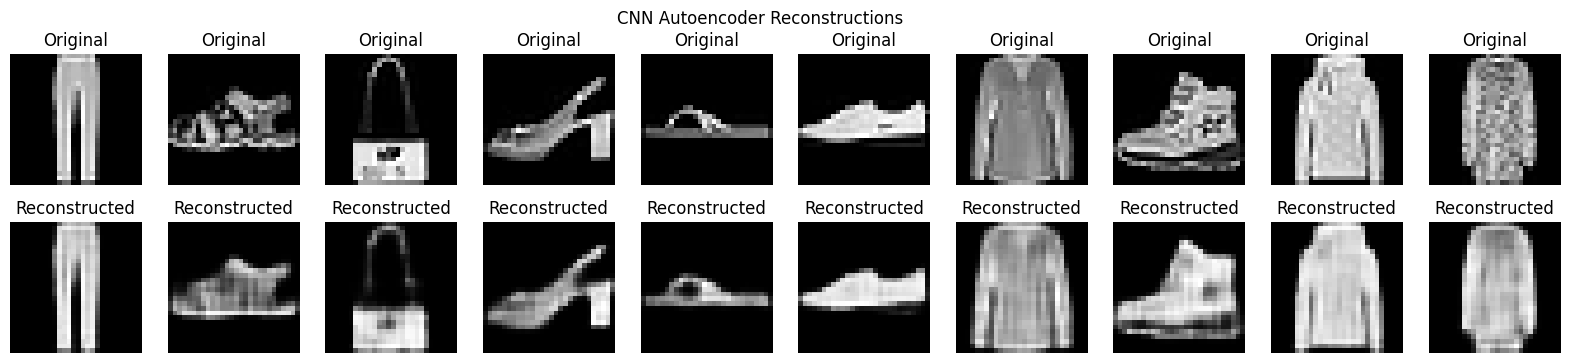

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


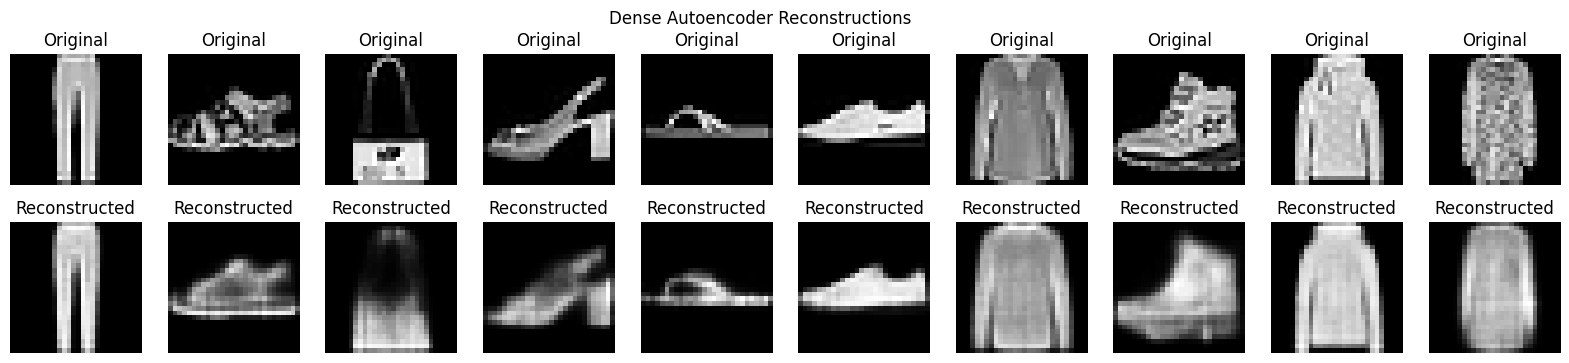

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test  = x_test.astype("float32") / 255.
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test  = np.reshape(x_test, (-1, 28, 28, 1))


def build_cnn_autoencoder(input_shape=(28,28,1)):
    input_img = layers.Input(shape=input_shape)

    x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(input_img)
    x = layers.MaxPooling2D((2,2), padding="same")(x)    # -> 14x14x32
    x = layers.Conv2D(16, (3,3), activation="relu", padding="same")(x)
    encoded = layers.MaxPooling2D((2,2), padding="same")(x)  # -> 7x7x16

    x = layers.Conv2D(16, (3,3), activation="relu", padding="same")(encoded)
    x = layers.UpSampling2D((2,2))(x)                      # -> 14x14x16
    x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(x)
    x = layers.UpSampling2D((2,2))(x)                      # -> 28x28x32
    decoded = layers.Conv2D(1, (3,3), activation="sigmoid", padding="same")(x)

    autoencoder = models.Model(input_img, decoded, name="cnn_autoencoder")
    autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
    return autoencoder

cnn_autoencoder = build_cnn_autoencoder()

def build_dense_autoencoder(input_shape=(28,28,1)):
    input_img = layers.Input(shape=input_shape)
    flat = layers.Flatten()(input_img)

    encoded = layers.Dense(128, activation="relu")(flat)
    encoded = layers.Dense(64, activation="relu")(encoded)
    bottleneck = layers.Dense(32, activation="relu")(encoded)

    decoded = layers.Dense(64, activation="relu")(bottleneck)
    decoded = layers.Dense(128, activation="relu")(decoded)
    decoded = layers.Dense(28 * 28, activation="sigmoid")(decoded)
    decoded = layers.Reshape((28,28,1))(decoded)

    autoencoder = models.Model(input_img, decoded, name="dense_autoencoder")
    autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
    return autoencoder

dense_autoencoder = build_dense_autoencoder()

epochs = 20
batch_size = 256

print("Training CNN Autoencoder:")
cnn_history = cnn_autoencoder.fit(x_train, x_train,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  shuffle=True,
                                  validation_data=(x_test, x_test),
                                  verbose=1)

print("\nTraining Dense Autoencoder:")
dense_history = dense_autoencoder.fit(x_train, x_train,
                                      epochs=epochs,
                                      batch_size=batch_size,
                                      shuffle=True,
                                      validation_data=(x_test, x_test),
                                      verbose=1)

cnn_test_loss = cnn_autoencoder.evaluate(x_test, x_test, verbose=0)
dense_test_loss = dense_autoencoder.evaluate(x_test, x_test, verbose=0)

print("\nTest Loss Comparison:")
print(f"  CNN Autoencoder Loss:   {cnn_test_loss:.4f}")
print(f"  Dense Autoencoder Loss: {dense_test_loss:.4f}")

def plot_reconstructions(model, x_test, title, n=10):
    """Display original and reconstructed images side-by-side."""
    decoded_imgs = model.predict(x_test)
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28,28), cmap="gray")
        plt.title("Original")
        plt.axis("off")
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28,28), cmap="gray")
        plt.title("Reconstructed")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

n_samples = 10
sample_idx = np.random.choice(x_test.shape[0], n_samples, replace=False)
x_test_sample = x_test[sample_idx]

plot_reconstructions(cnn_autoencoder, x_test_sample, "CNN Autoencoder Reconstructions")

plot_reconstructions(dense_autoencoder, x_test_sample, "Dense Autoencoder Reconstructions")